In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cases = pd.read_csv('Cumulative_cases_data (1).csv')
cases = cases.drop(columns ='County Parameter Cum Curve')
cases["Count_Date"] = pd.to_datetime(cases["Day of Epi Dt"])
cases["month"] = cases.Count_Date.dt.month
cases["year"] = cases.Count_Date.dt.year
cases["day"] = cases.Count_Date.dt.day
cases["day_of_week"] = cases.Count_Date.dt.dayofweek
cases.head()

,Day of Epi Dt,Running Sum of Confirmed Cases By Epi Dt,Confirmed Cases By Epi Dt,Count_Date,month,year,day,day_of_week
0,"January 22, 2020",0,0,2020-01-22,1,2020,22,2
1,"January 23, 2020",0,0,2020-01-23,1,2020,23,3
2,"January 24, 2020",0,0,2020-01-24,1,2020,24,4
3,"January 25, 2020",0,0,2020-01-25,1,2020,25,5
4,"January 26, 2020",0,0,2020-01-26,1,2020,26,6


In [3]:
bikes = pd.read_csv('Eco-Totem_Capital_City_Trail_Bike_Counts.csv')
bikes.head()

,Count_Date,Count,OBJECTID
0,6/23/2015 11:00,92.0,0
1,6/23/2015 12:00,191.0,1
2,6/23/2015 13:00,156.0,2
3,6/23/2015 14:00,155.0,3
4,6/23/2015 15:00,243.0,4


In [4]:
bikes["Count_Date"] = pd.to_datetime(bikes["Count_Date"])
bikes["month"] = bikes.Count_Date.dt.month
bikes["year"] = bikes.Count_Date.dt.year
bikes["day"] = bikes.Count_Date.dt.day
bikes["hour"] = bikes.Count_Date.dt.hour
bikes["day_of_week"] = bikes.Count_Date.dt.dayofweek

bikes.head()

,Count_Date,Count,OBJECTID,month,year,day,hour,day_of_week
0,2015-06-23 11:00:00,92.0,0,6,2015,23,11,1
1,2015-06-23 12:00:00,191.0,1,6,2015,23,12,1
2,2015-06-23 13:00:00,156.0,2,6,2015,23,13,1
3,2015-06-23 14:00:00,155.0,3,6,2015,23,14,1
4,2015-06-23 15:00:00,243.0,4,6,2015,23,15,1


In [5]:
def map_season(x):
    if x < 3 or x > 11:
        return "winter"
    elif x >= 3 and x <= 4:
        return "spring"
    elif x >= 5 and x <= 8:
        return "summer"
    else:
        return "fall"
    
bikes["season"] = bikes["month"].apply(map_season)
bikes.head()

,Count_Date,Count,OBJECTID,month,year,day,hour,day_of_week,season
0,2015-06-23 11:00:00,92.0,0,6,2015,23,11,1,summer
1,2015-06-23 12:00:00,191.0,1,6,2015,23,12,1,summer
2,2015-06-23 13:00:00,156.0,2,6,2015,23,13,1,summer
3,2015-06-23 14:00:00,155.0,3,6,2015,23,14,1,summer
4,2015-06-23 15:00:00,243.0,4,6,2015,23,15,1,summer


In [6]:
bikes_2019 = bikes[bikes['year'] == 2019]
bikes_2020 = bikes[bikes['year'] == 2020]


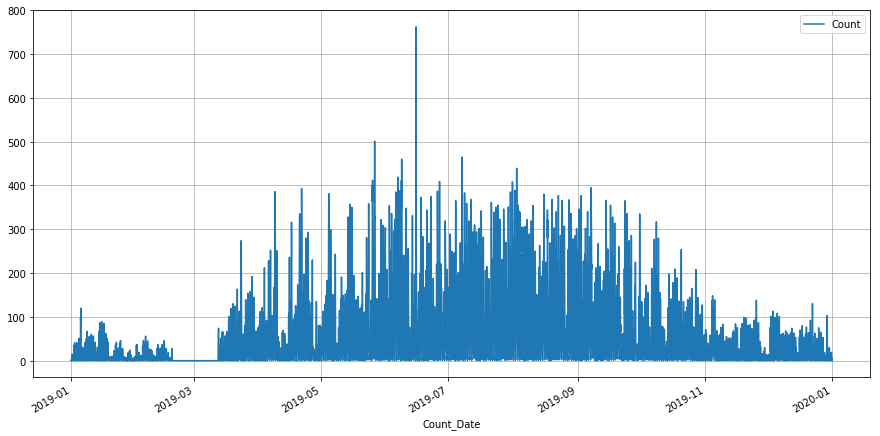

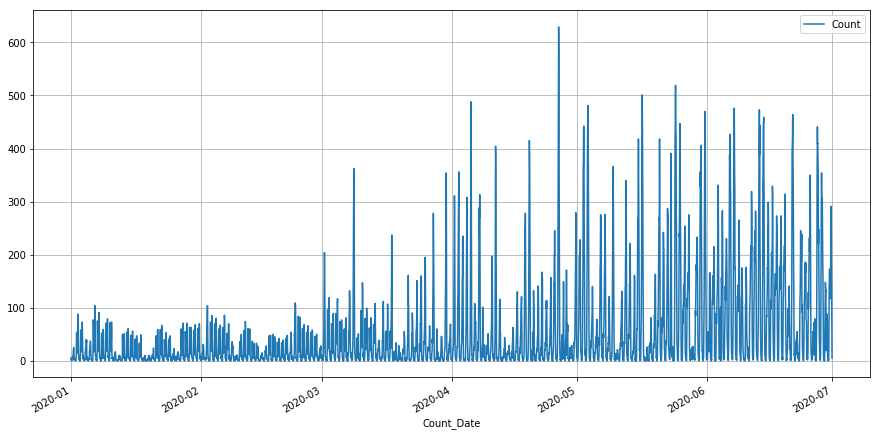

In [12]:
ax_2019 = bikes_2019.plot.line(x = 'Count_Date', y = 'Count', figsize = (15,7.5), grid = True)
bikes_2020.plot.line(x = 'Count_Date', y = 'Count', figsize = (15,7.5), grid = True)

In [8]:
bikes["covid"] = bikes[["month", "year"]].apply(lambda x: 'After Covid' if x["month"] >= 3 and x["year"] == 2020 else 'Before Covid', axis = 1)
bikes = bikes.sort_values(by='Count_Date')
bikes.sample(10)

,Count_Date,Count,OBJECTID,month,year,day,hour,day_of_week,season,covid
34286,2019-05-22 02:00:00,4.0,34286,5,2019,22,2,2,summer,Before Covid
42180,2020-04-15 01:00:00,1.0,42180,4,2020,15,1,2,spring,After Covid
36169,2019-08-08 13:00:00,144.0,36169,8,2019,8,13,3,summer,Before Covid
29593,2018-11-07 12:00:00,23.0,29593,11,2018,7,12,2,fall,Before Covid
29105,2018-10-18 04:00:00,1.0,29105,10,2018,18,4,3,fall,Before Covid
2458,2015-10-03 21:00:00,21.0,2458,10,2015,3,21,5,fall,Before Covid
6317,2016-03-12 16:00:00,238.0,6317,3,2016,12,16,5,spring,Before Covid
3199,2015-11-03 18:00:00,117.0,3199,11,2015,3,18,1,fall,Before Covid
9181,2016-07-10 00:00:00,18.0,9181,7,2016,10,0,6,summer,Before Covid
1498,2015-08-24 21:00:00,41.0,1498,8,2015,24,21,0,summer,Before Covid


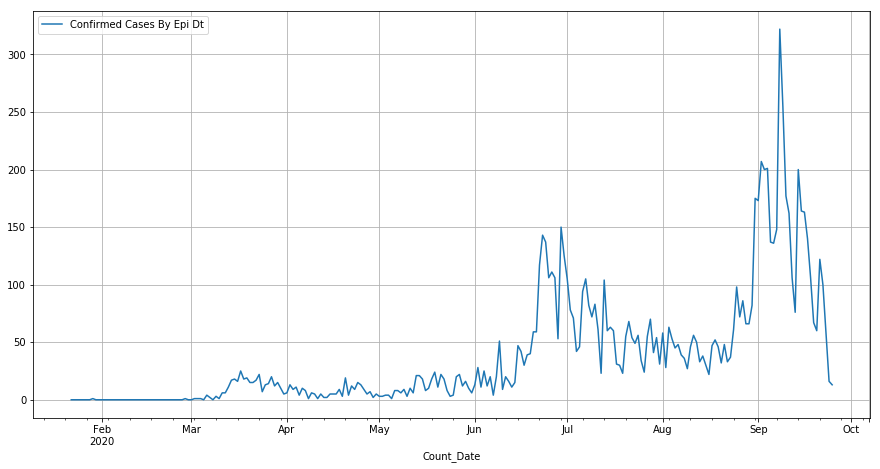

In [9]:
byday = cases.plot(x = 'Count_Date', y = 'Confirmed Cases By Epi Dt', figsize = (15,7.5), grid = True)
byday

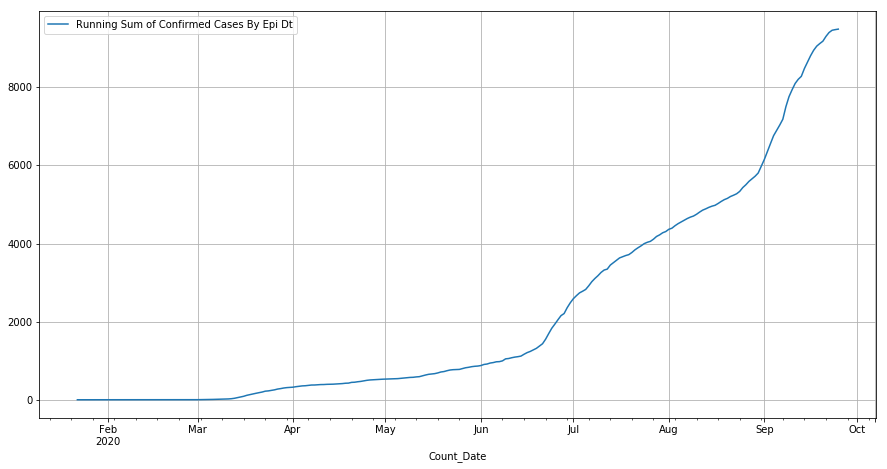

In [10]:
cases.plot(x = 'Count_Date', y = 'Running Sum of Confirmed Cases By Epi Dt', figsize = (15,7.5), grid = True)